In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\cifar-10-img\train"
test_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\cifar-10-img\test"

In [3]:
IMG_SIZE = 32 

In [4]:
VGG16_WEIGHTS_PATH = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  # Use 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='sparse',  # Use sparse because the labels are integers
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='sparse',  # Use sparse for integer labels
    subset='validation')

Found 32067 images belonging to 10 classes.
Found 8012 images belonging to 10 classes.


In [6]:
base_model = tf.keras.applications.VGG16(
    weights=None,  # Do not load the pre-trained VGG16 model
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

In [7]:
base_model.load_weights(VGG16_WEIGHTS_PATH)

In [8]:
base_model.trainable = False


In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
______________________________________

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
1003/1003 [==============================] - 113s 106ms/step - loss: 1.3931 - accuracy: 0.5101 - val_loss: 1.3077 - val_accuracy: 0.5434
Epoch 2/5
1003/1003 [==============================] - 24s 24ms/step - loss: 1.2070 - accuracy: 0.5743 - val_loss: 1.2345 - val_accuracy: 0.5716
Epoch 3/5
1003/1003 [==============================] - 24s 24ms/step - loss: 1.1324 - accuracy: 0.5986 - val_loss: 1.1811 - val_accuracy: 0.5871
Epoch 4/5
1003/1003 [==============================] - 24s 24ms/step - loss: 1.0759 - accuracy: 0.6195 - val_loss: 1.1827 - val_accuracy: 0.5926
Epoch 5/5
1003/1003 [==============================] - 24s 24ms/step - loss: 1.0275 - accuracy: 0.6357 - val_loss: 1.1596 - val_accuracy: 0.6027


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 9921 images belonging to 10 classes.


In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Normal model accuracy: {test_acc:.4f}")

311/311 [==============================] - 28s 88ms/step - loss: 1.1480 - accuracy: 0.6018
Normal model accuracy: 0.6018


In [15]:
base_model.trainable = True
fine_tune_at = 15

In [16]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
1003/1003 [==============================] - 40s 38ms/step - loss: 0.8774 - accuracy: 0.6901 - val_loss: 0.9888 - val_accuracy: 0.6610
Epoch 2/5
1003/1003 [==============================] - 38s 38ms/step - loss: 0.7260 - accuracy: 0.7435 - val_loss: 0.9854 - val_accuracy: 0.6667
Epoch 3/5
1003/1003 [==============================] - 38s 38ms/step - loss: 0.6273 - accuracy: 0.7791 - val_loss: 0.9330 - val_accuracy: 0.6872
Epoch 4/5
1003/1003 [==============================] - 38s 38ms/step - loss: 0.5503 - accuracy: 0.8065 - val_loss: 0.9339 - val_accuracy: 0.6915
Epoch 5/5
1003/1003 [==============================] - 38s 38ms/step - loss: 0.4740 - accuracy: 0.8342 - val_loss: 0.9236 - val_accuracy: 0.7007


In [19]:
test_loss_fine_tune, test_acc_fine_tune = model.evaluate(test_generator)
print(f"Fine-tuned model accuracy: {test_acc_fine_tune:.4f}")

311/311 [==============================] - 6s 20ms/step - loss: 0.9001 - accuracy: 0.7009
Fine-tuned model accuracy: 0.7009


AttributeError: 'dict' object has no attribute 'history'

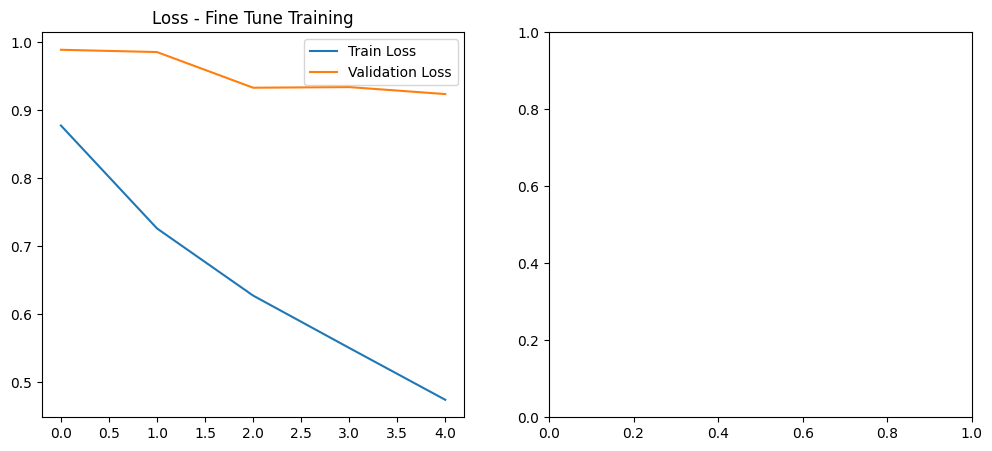

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['loss'], label='Train Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Loss - Fine Tune Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine_tune.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Fine Tune Training')
plt.legend()

plt.tight_layout()
plt.show()

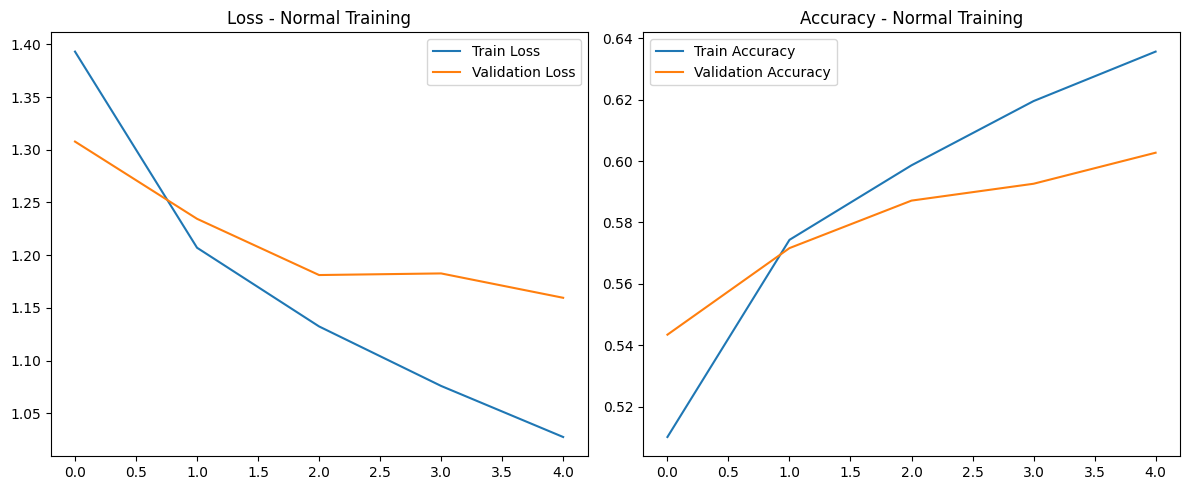

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss - Normal Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Normal Training')
plt.legend()

plt.tight_layout()
plt.show()